<span class="mathmacros" style="display:none;">
$\def\bra#1{\mathinner{\langle{#1}|}}
\def\ket#1{\mathinner{|{#1}\rangle}}
\def\braket#1{\mathinner{\langle{#1}\rangle}}
\newcommand{\mdef}{\overset{\mathrm{def}}{=}}
\newcommand{\bm}{\mathbf}
\newcommand{\inv}[1]{#1^{-1}}   % Inverse Matrix
\newcommand{\invt}[1]{#1^{-T}}  % Inverse Transposed Matrix
\renewcommand{\nl}{\\&\phantom{{}={}}}% Newline In aligned equations
\newcommand{\pfr}[2]{\frac{\pp #1}{\pp #2}}      % Partial derivative
\newcommand{\dfr}[2]{\frac{\dd #1}{\dd #2}}      % Total derivative
\newcommand{\pp}{\partial}
\newcommand{\ee}{\mathrm{e}}
\newcommand{\ii}{\mathrm{i}}
\DeclareMathOperator{\Var}{Var}
\DeclareMathOperator{\det}{det}
\DeclareMathOperator{\tr}{tr}
\DeclareMathOperator{\sgn}{sgn}
\DeclareMathOperator{\adj}{adj}
\DeclareMathOperator{\dd}{d}
\DeclareMathOperator{\rhs}{RHS}
\DeclareMathOperator{\lhs}{LHS}
\newcommand{\nl}{\\&\phantom{={}}}
\DeclareMathOperator{\E}{E}
\DeclareMathOperator{\Cov}{Cov}
\DeclareMathOperator{\Beta}{B}
\DeclareMathOperator{\Bdist}{Beta}$
</span>

In [9]:
from transmit import cat
from functools import partial
from importlib import reload
reload(cat);

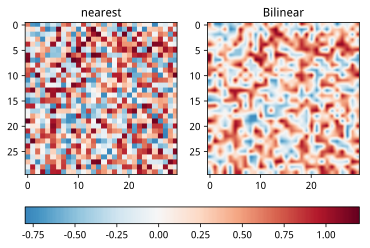

In [4]:
m = uniform(-1, 1, (30, 30))+.2
fig, ax = subplots(1, 2)
cax = ax[0].imshow(m, cmap="RdBu_r", norm=cat.CenterNorm(), interpolation='nearest');
ax[0].set_title('nearest')
cax = ax[1].imshow(m, cmap="RdBu_r", norm=cat.CenterNorm(), interpolation='bilinear');
ax[1].set_title('Bilinear')
plt.colorbar(cax, ax=ax.ravel().tolist(), orientation='horizontal');

### List
+ Wigner test and measure...
+ Two site coupling
+ Use larger $dk$ to reduce width
+ Pinlei

### Husimi Q function
$$Q(\alpha)=\tr_R[\bra{\alpha_L}\rho\ket{\alpha_L}]$$

### Wigner function
\begin{align}
W(\alpha)&=D(\alpha)PD(-\alpha)\\
D(\alpha)&=\exp[\alpha a^\dagger-\alpha^*a]\\
P&=\exp(\ii\pi N)=(-1)^N\\
\end{align}

It is obvious that $PP^\dagger=P^2=1$. As $[N, a^\dagger]=a^\dagger$, we apply Baker-Hausdroff's formula to get
\begin{align}
Pa^\dagger P&=\exp(\ii \pi N) a^\dagger \exp(-\ii \pi N)=-a^\dagger\\
PaP&=-a\\
PD_zP&=PD_{-z}
\end{align}

Finally we have
$$D(\alpha)PD(-\alpha)=PD(-2\alpha)=Pe^{-2|\alpha|^2}e^{-\alpha a^\dagger}e^{\alpha^*a},$$
where $e^{\alpha^*a}$ is lower triangular and $e^{-\alpha a^\dagger}$ is upper triangular. This expression is  now handy to evaluate.

In [5]:
N=10
an = cat.exp_an(2, N)
ap = cat.exp_ap(-2, N)
U = exp(-2)*ap@an

In [6]:
U[0,:10]

array([0.13533528+0.j, 0.27067057+0.j, 0.38278599+0.j, 0.44200318+0.j,
       0.44200318+0.j, 0.39533967+0.j, 0.32279349+0.j, 0.24400894+0.j,
       0.17254038+0.j, 0.11502692+0.j])

### Wigner MPO
$D(\alpha)=\prod \exp[(\alpha c_i)a^\dagger_i-h.c.]=$

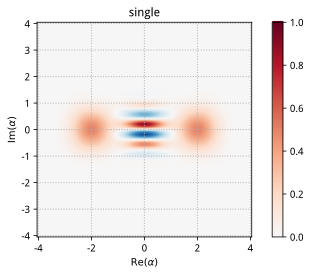

In [24]:
u = 6
h = 1
psi = cat.Single(cat.coherent(2, 15), {'u':u, 'h':h}, 30)
psi.evolve(np.pi*u/2/h**2)
x = np.linspace(-4, 4, 81)
y = np.linspace(-4, 4, 81)
z = cat.zgrid(x, y, partial(psi.wigner, i=0))
cat.draw_function(x, y, z, title="single", grid=True, vmin=0, vmax=1);